In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os

# Messy Data and Data Cleaning

## Outline

* Data Generating Processes.
* Introduction to field types.
* Outliers: how to spot them and fix them.
* Missing values: understanding them and dropping them.

## There is no such thing as 'raw data'.

* Data are the result of measurements that must be recorded.
* Humans design the measurements and record the results.
* Data is *always* an imperfect record of the underlying processing being measured.

## Data Generating Process

* A **data generating process** is the underlying, real-world (probabilistic) mechanism that generates the observed data. 
* Observed data is an incomplete artifact of the data generating process.
* A data generating process is what a statistical model attempts to describe.

Cleaning data requires understanding of the data generating process.

### Example: Unemployment Data
* Problem: predict the effect policy X has on the US labor market
    - Does it decrease unemployment? Increase wages?
* Data: [labor force data](https://www.bls.gov/cps/cps_htgm.pdf) collected by the BLS (U.S. Bureau of Labor Statistics)


### Example: Unemployment Data
* Sample quality: Is the BLS data a sample or census?
* Measurement; who is counted as:
    - employed? unemployed? underemployed? not in the labor force?
* The data are generated according to a *political* process!
    - For an introduction, see [this article](https://www.nytimes.com/2018/09/14/opinion/columnists/great-recession-economy-gdp.html)

## Data Provenance: can I trust my data?

Understanding as much as possible about the lineage of data from 
1. The assumptions on the data generating process, to
2. the initial measurements of that (or a similar) process, to  
3. the data in its eventually acquired form.

# Data Cleaning

## Data Cleaning

* The process of transforming data:
    - into a faithful representation of an underlying data generating process 
    - to facilitate subsequent analysis.

* In practice, data cleaning is often detective work to understand data provenance.
    - **always be skeptical of your data!**

## Data cleaning often addresses:

* The structure of the recorded data 
    - are the individual properly represented as rows?
* The encoding and format of the values in the data.
    - are the data types of a column reflective of the information it contains?
* Corrupt and "incorrect" data; missing values.
    - were their flaws in the 'data recording process'?

<img src="imgs/image_2.png"/>

### Discussion: are each of the following Quantitative, Ordinal, or Nominal?

1. **Price in dollars of a product?**
1. **Star Rating on Yelp?**
1. **Date/time an item was sold?**
1. **Day of the week an item was sold?**
1. **A Credit Card Number?**

### Answers:

|Question|Answer|
|---|---|
|Price in dollars of a product|Quantitatave|
|Star Rating on Yelp|Ordinal|
|Date an item was sold|Quantitative|
|Day of week an item was sold|????|
|Credit Card Number|Nominal|

## Converting data types in Pandas

### Student dataset
- **Student ID, Student Name** (should be clear)
- **Month, Day, Year**: date when student was accepted to UCSD
- **2018, 2019 tuitions and growth** (should be clear)
- **Paid**: Indicates if tuition is paid yet
- **DSC80 Final grade**: Some students may take class for Pass/Fail

What needs to be changed in the dataframe to compute statistics?

In [2]:
df = pd.read_csv("data/Data.csv")
df

,Student ID,Student Name,Month,Day,Year,2018 tuition,2019 tuition,Percent Growth,Paid,DSC 80 Final Grade
0,10002.0,John Black,10,12,2018,$40000.00,$50000.00,25.00%,N,89
1,552278.0,Mark White,4,15,2017,$9200.00,$10120.00,10.00%,Y,90
2,23477.0,Amy Red,5,14,2016,$50000.00,$62500.00,25.00%,N,97
3,24900.0,Tom Green,7,10,2015,$7000.00,$9800.00,40.00%,Y,54
4,651029.0,Rose Pink,3,3,2014,$10000.00,$5000.00,-50.00%,Y,Pass


### What is the sum of tuition paid in 2018 and 2019?
* Sum tuition columns using `+`
* Save it in a `pd.Series` called `total`.

In [3]:
df

,Student ID,Student Name,Month,Day,Year,2018 tuition,2019 tuition,Percent Growth,Paid,DSC 80 Final Grade
0,10002.0,John Black,10,12,2018,$40000.00,$50000.00,25.00%,N,89
1,552278.0,Mark White,4,15,2017,$9200.00,$10120.00,10.00%,Y,90
2,23477.0,Amy Red,5,14,2016,$50000.00,$62500.00,25.00%,N,97
3,24900.0,Tom Green,7,10,2015,$7000.00,$9800.00,40.00%,Y,54
4,651029.0,Rose Pink,3,3,2014,$10000.00,$5000.00,-50.00%,Y,Pass


In [4]:
total = df['2018 tuition'] + df['2019 tuition']
total

0    $40000.00$50000.00
1     $9200.00$10120.00
2    $50000.00$62500.00
3      $7000.00$9800.00
4     $10000.00$5000.00
dtype: object

### Check the data types of the student table
* What data type *should* each column have?
* What kinds of data should each column have?
    - Quantitative, Catgorical (Ordinal, Nominal)
* Use the `df.dtypes` attribute to peak at the data types.

In [5]:
df.dtypes

Student ID            float64
Student Name           object
Month                   int64
Day                     int64
Year                    int64
2018 tuition           object
2019 tuition           object
Percent Growth         object
Paid                   object
DSC 80 Final Grade     object
dtype: object

### Cleaning up: `Student ID`

* `Student ID` is a `float64`, should be `int64`
* May be a float value due to earlier processing with e.g. Excel.
* Change the type using `.astype` method
    - `.astype` returns a copy!

In [6]:
df['Student ID'] = df['Student ID'].astype(np.int64)
df

,Student ID,Student Name,Month,Day,Year,2018 tuition,2019 tuition,Percent Growth,Paid,DSC 80 Final Grade
0,10002,John Black,10,12,2018,$40000.00,$50000.00,25.00%,N,89
1,552278,Mark White,4,15,2017,$9200.00,$10120.00,10.00%,Y,90
2,23477,Amy Red,5,14,2016,$50000.00,$62500.00,25.00%,N,97
3,24900,Tom Green,7,10,2015,$7000.00,$9800.00,40.00%,Y,54
4,651029,Rose Pink,3,3,2014,$10000.00,$5000.00,-50.00%,Y,Pass


### Cleaning up: `20xx tuition`

* `20xx tuition` are stored as `objects` (strings), not numerical values.
* The formatting character ($) causes the entries to be interpreted as strings.
* Use `str` methods to strip the dollar sign.

In [7]:
# try this!
df['2018 tuition'].astype(np.float64)

ValueError: could not convert string to float: '$40000.00'

In [8]:
# strip the $
df['2018 tuition'].str.strip('$').astype(np.float64)

0    40000.0
1     9200.0
2    50000.0
3     7000.0
4    10000.0
Name: 2018 tuition, dtype: float64

In [8]:
# looping through *columns* is ok! don't loop through rows.

for col in df.columns:
    if 'tuition' in col:
        df[col] = df[col].str.strip('$').astype(np.float64)
        
df

,Student ID,Student Name,Month,Day,Year,2018 tuition,2019 tuition,Percent Growth,Paid,DSC 80 Final Grade
0,10002,John Black,10,12,2018,40000.0,50000.0,25.00%,N,89
1,552278,Mark White,4,15,2017,9200.0,10120.0,10.00%,Y,90
2,23477,Amy Red,5,14,2016,50000.0,62500.0,25.00%,N,97
3,24900,Tom Green,7,10,2015,7000.0,9800.0,40.00%,Y,54
4,651029,Rose Pink,3,3,2014,10000.0,5000.0,-50.00%,Y,Pass


### Cleaning up: `Paid`

* The `Paid` column should be either `bool` type, or {0,1}.
* Y/N typical values from human entry.
* Use the `replace` method.

In [9]:
df['Paid'] = df['Paid'].replace({'Y': True, 'N': False})
df

,Student ID,Student Name,Month,Day,Year,2018 tuition,2019 tuition,Percent Growth,Paid,DSC 80 Final Grade
0,10002,John Black,10,12,2018,40000.0,50000.0,25.00%,False,89
1,552278,Mark White,4,15,2017,9200.0,10120.0,10.00%,True,90
2,23477,Amy Red,5,14,2016,50000.0,62500.0,25.00%,False,97
3,24900,Tom Green,7,10,2015,7000.0,9800.0,40.00%,True,54
4,651029,Rose Pink,3,3,2014,10000.0,5000.0,-50.00%,True,Pass


### Cleaning up: `Month, Day, and Year`
* Each are `int64` types; this could be *fine* for certain purposes.
* Could store as `objects` of the form `Year-Month-Day`
    - String sorting coincides with date sorting
* Could store as `datetime64` objects (later).

In [11]:
# What is happening with adding a Series and a string? (Broadcasting)
(
    df['Year'].astype(str) + '-' + 
    df['Month'].astype(str).str.zfill(2) + '-' + 
    df['Day'].astype(str).str.zfill(2)
)

0    2018-10-12
1    2017-04-15
2    2016-05-14
3    2015-07-10
4    2014-03-03
dtype: object

### Cleaning up: `DSC 80 Final Grade`

* `DSC 80 Final Grade` stored as an object.
    - most entries should be numeric;
    - final entry cannot be converted.
* Can use `pd.to_numeric(Series, errors='coerce')`.
    - Be careful with this!
    - `errors='coerce'` can cause uninformed destruction of data.

In [12]:
# try: astype
df

,Student ID,Student Name,Month,Day,Year,2018 tuition,2019 tuition,Percent Growth,Paid,DSC 80 Final Grade
0,10002,John Black,10,12,2018,40000.0,50000.0,25.00%,False,89
1,552278,Mark White,4,15,2017,9200.0,10120.0,10.00%,True,90
2,23477,Amy Red,5,14,2016,50000.0,62500.0,25.00%,False,97
3,24900,Tom Green,7,10,2015,7000.0,9800.0,40.00%,True,54
4,651029,Rose Pink,3,3,2014,10000.0,5000.0,-50.00%,True,Pass


In [13]:
df['DSC 80 Final Grade'] = pd.to_numeric(df['DSC 80 Final Grade'], errors='coerce')
df

,Student ID,Student Name,Month,Day,Year,2018 tuition,2019 tuition,Percent Growth,Paid,DSC 80 Final Grade
0,10002,John Black,10,12,2018,40000.0,50000.0,25.00%,False,89.0
1,552278,Mark White,4,15,2017,9200.0,10120.0,10.00%,True,90.0
2,23477,Amy Red,5,14,2016,50000.0,62500.0,25.00%,False,97.0
3,24900,Tom Green,7,10,2015,7000.0,9800.0,40.00%,True,54.0
4,651029,Rose Pink,3,3,2014,10000.0,5000.0,-50.00%,True,NaN


### Cleaning up: `Student Name`
* Need the `Student Name` column to have form **Last Name, First Name**.
* Use a custom function and the `apply` method.
    - `Series.apply(func)` applies the function `func` to each entry of `Series`.

In [14]:
df['Student Name']

0    John Black
1    Mark White
2       Amy Red
3     Tom Green
4     Rose Pink
Name: Student Name, dtype: object

In [15]:
def transpose_name(name):
    firstname, lastname = name.split()
    return lastname + ', ' + firstname

transpose_name('Aaron Fraenkel')

'Fraenkel, Aaron'

In [16]:
df['Student Name'].apply(transpose_name)

0    Black, John
1    White, Mark
2       Red, Amy
3     Green, Tom
4     Pink, Rose
Name: Student Name, dtype: object

### More data type ambiguities

<div class="image-txt-container">

1. 1537660383 looks like a number, but is probably a date (Unix timestamp)

2. "USD 1,000,000" looks like a string, but is actually a number and a unit.

3. 02111 looks like a number, but is really a zip code (and isn't equal to 2,111)

<img src="imgs/image_3.png"/>

</div>

## How well does the data capture "reality"

* Does my data contain unrealistic or "incorrect" values?
    - Dates in the future for events in the past
    - Locations that don't exist
    - Negative counts
    - Misspellings of names
    - Large outliers


## How well does the data capture "reality"

    
* Does my data violate obvious dependencies?
    - E.g., age and birthday don't match 
    

* Was the data entered by hand?
     - Spelling errors, fields shifted …
     - Did the form require fields or provide default values?
     
* Are there obvious signs of curb stoning (data falsification):
    - Repeated names, fake looking email addresses, repeated use of uncommon names or fields.

# Vehicle Stop Data. Practical Example

## Data Source

<img src="imgs/image_4.png"/>


# Police Vehicle Stops

Vehicle stops made by the San Diego Police Department. 

Vehicle Stops files contain all vehicle stops for a given year.

<img src="imgs/image_5.png"/>

# SDPD Vehicle Stop Data


### Identifying messy data, general questions. 

1. Check the data types, notice any issues? What should we do?
2. String type fields have consistent values?
3. No missing values that we don't understand?
4. Are all values look in a reasonable range?
5. How do we deal with the messiness we found?

In [17]:
fp = os.path.join('data', 'Vehicle_stops_2016_datasd.csv')
stops = pd.read_csv(fp)
stops.head()

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,timestamp,stop_date,stop_time,sd_resident,arrested,searched,obtained_consent,contraband_found,property_seized
0,1308198,Equipment Violation,530,W,M,28,2016-01-01 00:06:00,2016-01-01,0:06,Y,N,N,N,N,N
1,1308172,Moving Violation,520,B,M,25,2016-01-01 00:10:00,2016-01-01,0:10,N,N,N,NaN,NaN,NaN
2,1308171,Moving Violation,110,H,F,31,2016-01-01 00:14:00,2016-01-01,0:14,NaN,NaN,NaN,NaN,NaN,NaN
3,1308170,Moving Violation,Unknown,W,F,29,2016-01-01 00:16:00,2016-01-01,0:16,N,N,N,NaN,NaN,NaN
4,1308197,Moving Violation,230,W,M,52,2016-01-01 00:30:00,2016-01-01,0:30,N,N,N,NaN,NaN,NaN


### SDPD vehicle stops: data types
* Are the data types correct?
* Are they easily fixable?

In [18]:
# are the data types correct? How to fix them?
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103051 entries, 0 to 103050
Data columns (total 15 columns):
stop_id             103051 non-null int64
stop_cause          103044 non-null object
service_area        103051 non-null object
subject_race        102920 non-null object
subject_sex         102865 non-null object
subject_age         100284 non-null object
timestamp           102879 non-null object
stop_date           103051 non-null object
stop_time           103051 non-null object
sd_resident         83689 non-null object
arrested            84400 non-null object
searched            83330 non-null object
obtained_consent    4791 non-null object
contraband_found    4969 non-null object
property_seized     4924 non-null object
dtypes: int64(1), object(14)
memory usage: 11.8+ MB


### SDPD vehicle stops: unfaithfulness
* Are there suspicious values?
* If a value is suspicious, can we trust the observation?
* Age: Nonsensical? Too old? Too young?

In [19]:
stops['subject_age'].unique()

array(['28', '25', '31', '29', '52', '24', '20', '50', '23', '54', '53',
       '35', '38', '18', '48', '68', '45', '63', '49', '42', '27', '19',
       '55', '32', '47', '33', '41', '59', '60', '58', '26', '36', '40',
       '39', '21', '64', '30', '43', '17', '51', '34', '56', '44', '22',
       '69', '46', '16', '57', '37', '65', '72', '67', '66', '70', '62',
       '73', '74', '0', '77', nan, '89', '79', '61', '78', '99', '75',
       '85', '82', '71', '15', '80', '81', '93', '84', '76', '2', '4',
       '86', '91', '83', '88', '98', '87', 'No Age', '9', '100', '14',
       '95', '96', '92', '119', '1', '90', '163', '5', '114', '94', '10',
       '212', '220', '6', '145', '97', '120'], dtype=object)

In [20]:
ages = pd.to_numeric(stops['subject_age'], errors='coerce')
ages.head()

0    28.0
1    25.0
2    31.0
3    29.0
4    52.0
Name: subject_age, dtype: float64

In [21]:
ages.describe()

count    99648.000000
mean        37.277697
std         14.456934
min          0.000000
25%         25.000000
50%         34.000000
75%         47.000000
max        220.000000
Name: subject_age, dtype: float64

In [22]:
# drop the rows? change age value to null? Is there really a 220 year old? (investigate!)
stops[(ages > 100)]

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,timestamp,stop_date,stop_time,sd_resident,arrested,searched,obtained_consent,contraband_found,property_seized
25029,1333254,Equipment Violation,820,W,F,119,2016-03-19 22:20:00,2016-03-19,22:20,N,N,N,NaN,NaN,NaN
34179,1375483,Moving Violation,510,W,M,163,2016-04-18 16:35:00,2016-04-18,16:35,N,N,N,NaN,NaN,NaN
36968,1378369,Moving Violation,240,A,F,114,2016-04-28 11:44:00,2016-04-28,11:44,NaN,NaN,NaN,NaN,NaN,NaN
63570,1405478,Moving Violation,110,V,M,212,2016-08-04 18:10:00,2016-08-04,18:10,Y,N,N,NaN,NaN,NaN
70267,1411694,Moving Violation,310,H,F,220,2016-08-30 18:28:00,2016-08-30,18:28,Y,N,N,NaN,NaN,NaN
77038,1418885,Moving Violation,830,B,M,145,2016-09-22 20:35:00,2016-09-22,20:35,Y,N,Y,N,N,NaN
99449,1440889,Equipment Violation,120,W,F,120,2016-12-15 19:28:00,2016-12-15,19:28,Y,N,N,NaN,NaN,NaN


In [23]:
ages.loc[lambda x:(0<=x) & (x<16)].value_counts()

0.0     218
15.0     27
2.0       6
14.0      5
4.0       4
10.0      2
1.0       2
6.0       1
5.0       1
9.0       1
Name: subject_age, dtype: int64

In [24]:
stops[(0 < ages) & (ages < 16)]

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,timestamp,stop_date,stop_time,sd_resident,arrested,searched,obtained_consent,contraband_found,property_seized
1686,1309896,Moving Violation,120,W,M,15,2016-01-08 19:30:00,2016-01-08,19:30,N,N,N,NaN,NaN,NaN
2838,1313254,Moving Violation,240,W,M,15,2016-01-13 05:25:00,2016-01-13,5:25,Y,N,N,NaN,NaN,NaN
3028,1310956,Moving Violation,240,V,M,2,2016-01-13 15:37:00,2016-01-13,15:37,Y,N,N,NaN,NaN,NaN
4343,1312481,Moving Violation,510,H,F,15,2016-01-18 04:00:00,2016-01-18,4:00,Y,Y,Y,N,N,N
4365,1312492,Equipment Violation,810,H,F,4,2016-01-18 07:13:00,2016-01-18,7:13,Y,N,N,NaN,NaN,NaN
4590,1312611,Moving Violation,830,H,M,15,2016-01-18 13:36:00,2016-01-18,13:36,NaN,NaN,NaN,NaN,NaN,NaN
11537,1319497,Moving Violation,810,W,F,2,2016-02-06 21:10:00,2016-02-06,21:10,N,N,N,NaN,NaN,NaN
12046,1319841,Moving Violation,310,H,M,9,2016-02-08 13:41:00,2016-02-08,13:41,Y,N,N,NaN,NaN,NaN
13661,1321509,Moving Violation,610,W,M,14,2016-02-12 09:50:00,2016-02-12,9:50,Y,N,N,NaN,NaN,NaN
14837,1323270,Moving Violation,310,P,M,15,2016-02-17 08:10:00,2016-02-17,8:10,Y,N,N,NaN,NaN,NaN


### SDPD data: unfaithful `subject_age`

* Values of 'No Age' and 0 likely explicit null values
* Unusually small/large ages errors in data entry?
    - Rest of record is well formed.
* Hard to tell for ages 14,15.
    - Each has more than one occurance; possibly real?

### SDPD vehicle stops: human entered data
* Which fields were likely entered by a human?
* Which fields were likely generated by code?
    - what was the original source?

In [27]:
# stop cause
stops.stop_cause.value_counts()


Moving Violation                      75200
Equipment Violation                   26234
Radio Call/Citizen Contact              571
Muni, County, H&S Code                  319
Personal Knowledge/Informant            289
No Cause Specified on a Card            184
Suspect Info (I.S., Bulletin, Log)      181
Personal Observ/Knowledge                45
MUNI, County, H&S Code                   14
Bicycle                                   2
Suspect Info                              2
BICYCLE                                   1
B & P                                     1
Bicycle Bicycle                           1
Name: stop_cause, dtype: int64

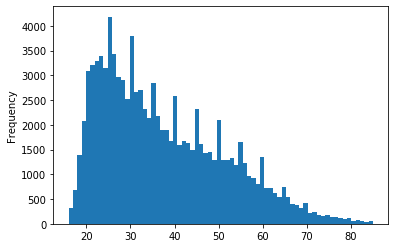

In [26]:
# age distribution -- reasonable ages (e.g. 15-85)
ages.loc[lambda x:(x > 15) & (x<=85)].plot(kind='hist', bins=70)

In [28]:
# computer generated?
stops[['timestamp', 'stop_date', 'stop_time']].head()

,timestamp,stop_date,stop_time
0,2016-01-01 00:06:00,2016-01-01,0:06
1,2016-01-01 00:10:00,2016-01-01,0:10
2,2016-01-01 00:14:00,2016-01-01,0:14
3,2016-01-01 00:16:00,2016-01-01,0:16
4,2016-01-01 00:30:00,2016-01-01,0:30


In [31]:
stops[['timestamp', 'stop_date', 'stop_time']].tail(10)

,timestamp,stop_date,stop_time
103041,NaN,2016-12-13,0.398611111
103042,NaN,2016-12-15,0.383333333
103043,NaN,2016-12-15,0.397916667
103044,NaN,2016-12-19,0:91
103045,NaN,2016-12-20,0:82
103046,NaN,2016-12-20,0.397916667
103047,NaN,2016-12-21,0:73
103048,NaN,2016-12-21,0:94
103049,NaN,2016-12-29,0:81
103050,NaN,2016-12-29,-0:81


## Unfaithful data vs Outliers

* Unfaithful data are data that doesn't accurately represent the data generating processing being measured.
* Outliers are "ununsual" observations, unlike the rest of the data. They may be unfaithful, but they may be real (and interesting) as well! 
* The two are hard to tell apart; doing so often requires research.

# Outliers

* **Consistently "nonsense" values**
    - Is it a product of the data ingestion process? Time field has year 1899? Is it an inferred “default” value?
    - Solution: Change the value to the correct one!
    
* **Abnormal artifacts from the data collection process**
    - E.g. unreasonable spikes in recorded ages at round numbers (25, 35, 45)
    - Solution: Try "smoothing" (e.g. binning the ages)
        
* **Unreasonable outliers**
    - Data points with unrealistic and highly unreasonable values. E.g. age = 200
    - Solution: filter it? Maybe it points to bugs in the data collection? Maybe it's real and you should investigate!

# Missing Values

## Many reasons for missing values

* Missing values in a dataset can occur from:
    - Intentional logic, where a value doesn't make sense.
    - A non-response in the measurement process.
    - Mistakes in the recording process
    - ...
    
* Missing values are most often encoded with:
    - `NULL`, `None`, `NaN`, `""`

## Missing values come in many forms

* Missing values can appear as 'placeholder' values:
    - All forms of `0` are a common substitute for null.
    - -1 is column if a column must be non-negative.
    - 1900 and 1970 if a nonnull date is required.

## Missing values come in many forms

<div class="image-txt-container">
    
* These 'Missing Values' may be possible 'real' values!
* "Null Island" at 0°00'00.0"N+0°00'00.0"E
    - Null Island a popular jogging location on Strava fitness tracking app.
    - https://en.wikipedia.org/wiki/Null_Island

<img src="imgs/image_6.png"/>

</div>

### Messy missingness in vehicle stops data
* What are the non-`NaN` null values in the SDPD data?
    - Service Area: 'Unknown'
    - Subject Age: 0
    - Others?

## Handling null values in Pandas

* Null values are encoded using NumPy's `NaN` object, which is of float type.
* Method `.isnull()` for DataFrame/Series detects missing values.
    - returns a boolean DataFrame/Series!
* Methods `.dropna()` and `.fillna()` handle missing data.

In [32]:
# proportion of people without an age recorded
stops.subject_age.isnull().mean()

0.026850782622196777

In [35]:
# all columns null percentage
stops.isnull().mean()

stop_id             0.000000
stop_cause          0.000068
service_area        0.000000
subject_race        0.001271
subject_sex         0.001805
subject_age         0.026851
timestamp           0.001669
stop_date           0.000000
stop_time           0.000000
sd_resident         0.187888
arrested            0.180988
searched            0.191371
obtained_consent    0.953508
contraband_found    0.951781
property_seized     0.952218
dtype: float64

### Handling null values: dropping observations
* What happens if any row with a null value is dropped?
* Best to not drop observations until it's needed!

In [36]:
stops.shape

(103051, 15)

In [37]:
stops.dropna().shape

(4619, 15)

In [40]:
# Percentage of dataset dropped:
stops.isnull().any(axis=1).mean()

0.955177533454309

### `.dropna` method

* `.dropna()` drops rows containing *at least one* null value.
* `.dropna(how='all')` drops any row that contains *only* null values.
* `.dropna(axis=1)` drops *columns* containing at least one null value.
* Other keyword arguments: `thresh`, `subset`

In [41]:
nans = pd.DataFrame([[0,1,np.NaN], [np.NaN, np.NaN, np.NaN], [1, 2, 3]])
nans

,0,1,2
0,0.0,1.0,NaN
1,NaN,NaN,NaN
2,1.0,2.0,3.0


In [42]:
nans.dropna(how='any')

,0,1,2
2,1.0,2.0,3.0


In [43]:
nans.dropna(how='all')

,0,1,2
0,0.0,1.0,NaN
2,1.0,2.0,3.0


In [47]:
nans.dropna(axis=1)

""
0
1
2


In [53]:
nans.dropna(subset=[0,1])

,0,1,2
0,0.0,1.0,NaN
2,1.0,2.0,3.0


### `.fillna` method

* `.fillna(val)` fills null entries with value `val`.
* `.fillna(dict)` fills null entries using a dictionary `dict` of column/row values.
* `.fillna(method='ffill')` fills null entries using neighboring non-null values.

In [54]:
nans

,0,1,2
0,0.0,1.0,NaN
1,NaN,NaN,NaN
2,1.0,2.0,3.0


In [59]:
# fill with a fixed value
#nans.fillna("FILLED!")

In [58]:
# fill using a column-dictionary
#nans.fillna({0:'f0', 1:'f1', 2:'f2'})

In [57]:
# fill with the column mean
means = {c:nans[c].mean() for c in nans.columns}
nans.fillna(means)

,0,1,2
0,0.0,1.0,3.0
1,0.5,1.5,3.0
2,1.0,2.0,3.0


In [60]:
# backfill up columns
nans.fillna(method='bfill')

,0,1,2
0,0.0,1.0,3.0
1,1.0,2.0,3.0
2,1.0,2.0,3.0


In [61]:
# forward fill down columns
nans.fillna(method='ffill')

,0,1,2
0,0.0,1.0,NaN
1,0.0,1.0,NaN
2,1.0,2.0,3.0


## Data Types and `NaN`

* The result of *any* comparison (=,!=,<,>) with `NaN` is `False`.
     - Use functions for checking null: `np.isnan`, `np.isnull`
* `NaN` is of float-type.
* Be careful of Pandas type-coercian with `NaN`!

In [71]:
for x in nans.iloc[0]:
    if x == np.NaN:
        print("it's NaN!")
    else:
        print('nope!')

nope!
nope!
nope!


In [72]:
for x in nans.iloc[0]:
    if np.isnan(x):
        print("it's NaN!")
    else:
        print('nope!')

nope!
nope!
it's NaN!


In [ ]:
# series with null: ints are cast as float
nans = pd.Series([0,1,np.NaN])
nnan = pd.Series([0,1,1])

In [ ]:
# filled in: of float type
nans.dtype, nan.dtype